    Brands        Models         Colors Memory Storage Camera  Rating  \
0  SAMSUNG  GALAXY M31S    Mirage Black   8 GB  128 GB    Yes     4.3   
1    Nokia           3.2          Steel   2 GB   16 GB    Yes     3.8   
2   realme           C2   Diamond Black   2 GB     NaN    Yes     4.4   
3  Infinix        Note 5       Ice Blue   4 GB   64 GB    Yes     4.2   
4    Apple    iPhone 11           Black    4GB   64 GB    Yes     4.6   

   Selling Price  Original Price                Mobile  Discount  \
0          19330           20999  SAMSUNG GALAXY M31S       1669   
1          10199           10199             Nokia 3.2         0   
2           6999            7999            realme C2       1000   
3          12999           12999        Infinix Note 5         0   
4          49900           49900      Apple iPhone 11          0   

   discount percentage  
0             7.947998  
1             0.000000  
2            12.501563  
3             0.000000  
4             0.000000  
  

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


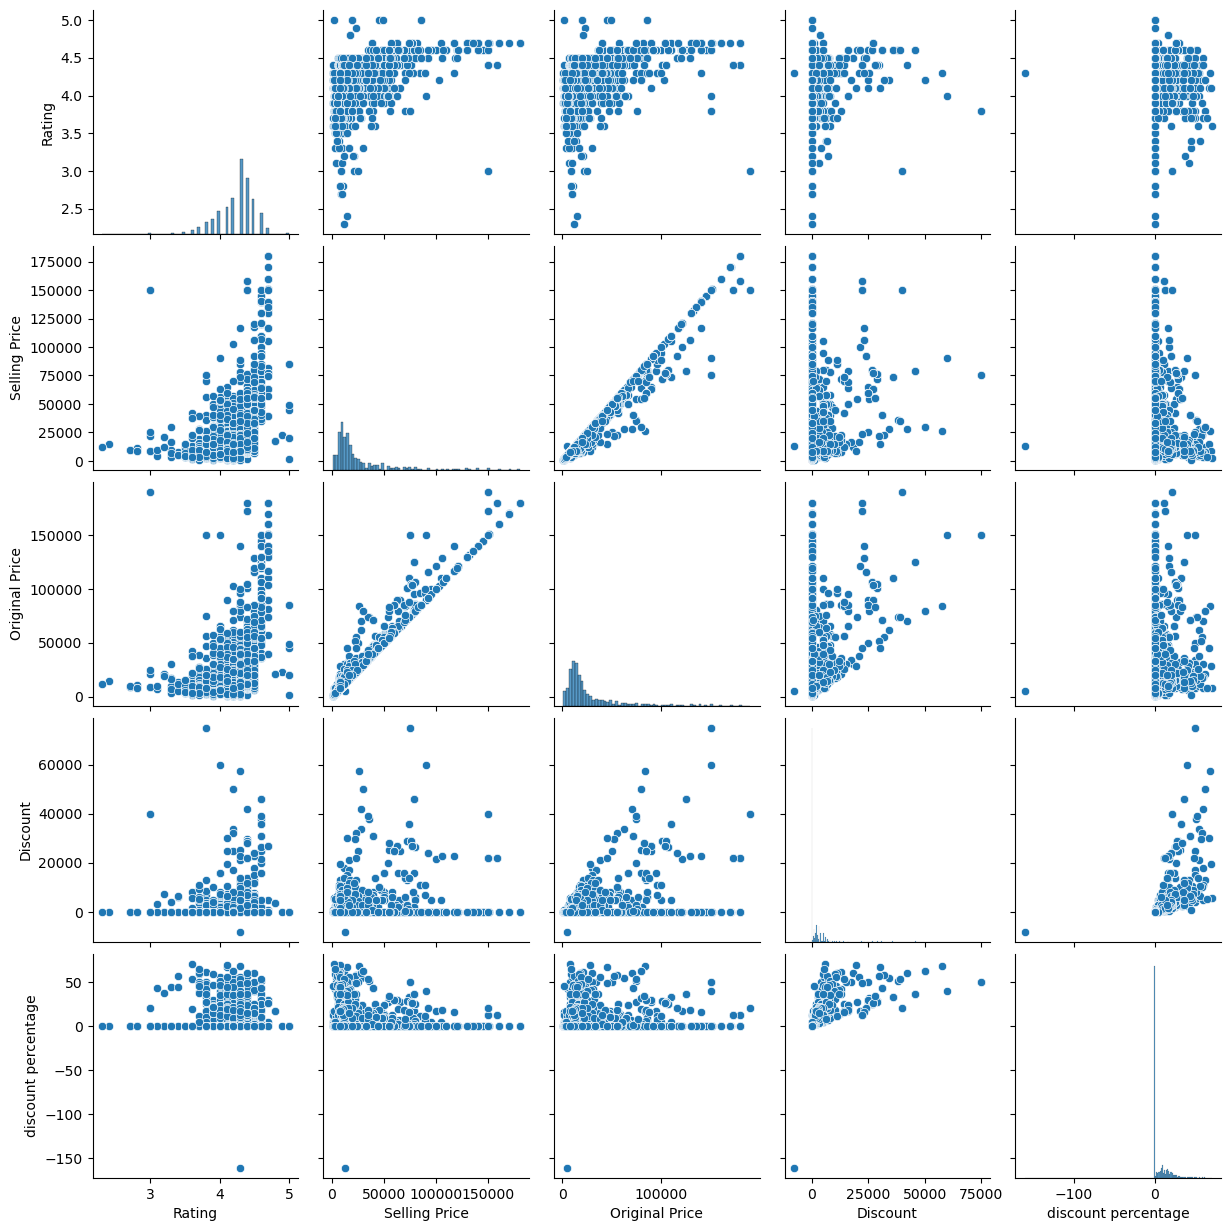

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("./Sales.csv")

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
summary_stats = data.describe()
print(summary_stats)

# Visualize the distribution of numerical features
sns.pairplot(data)
plt.show()

C:\Users\nisha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


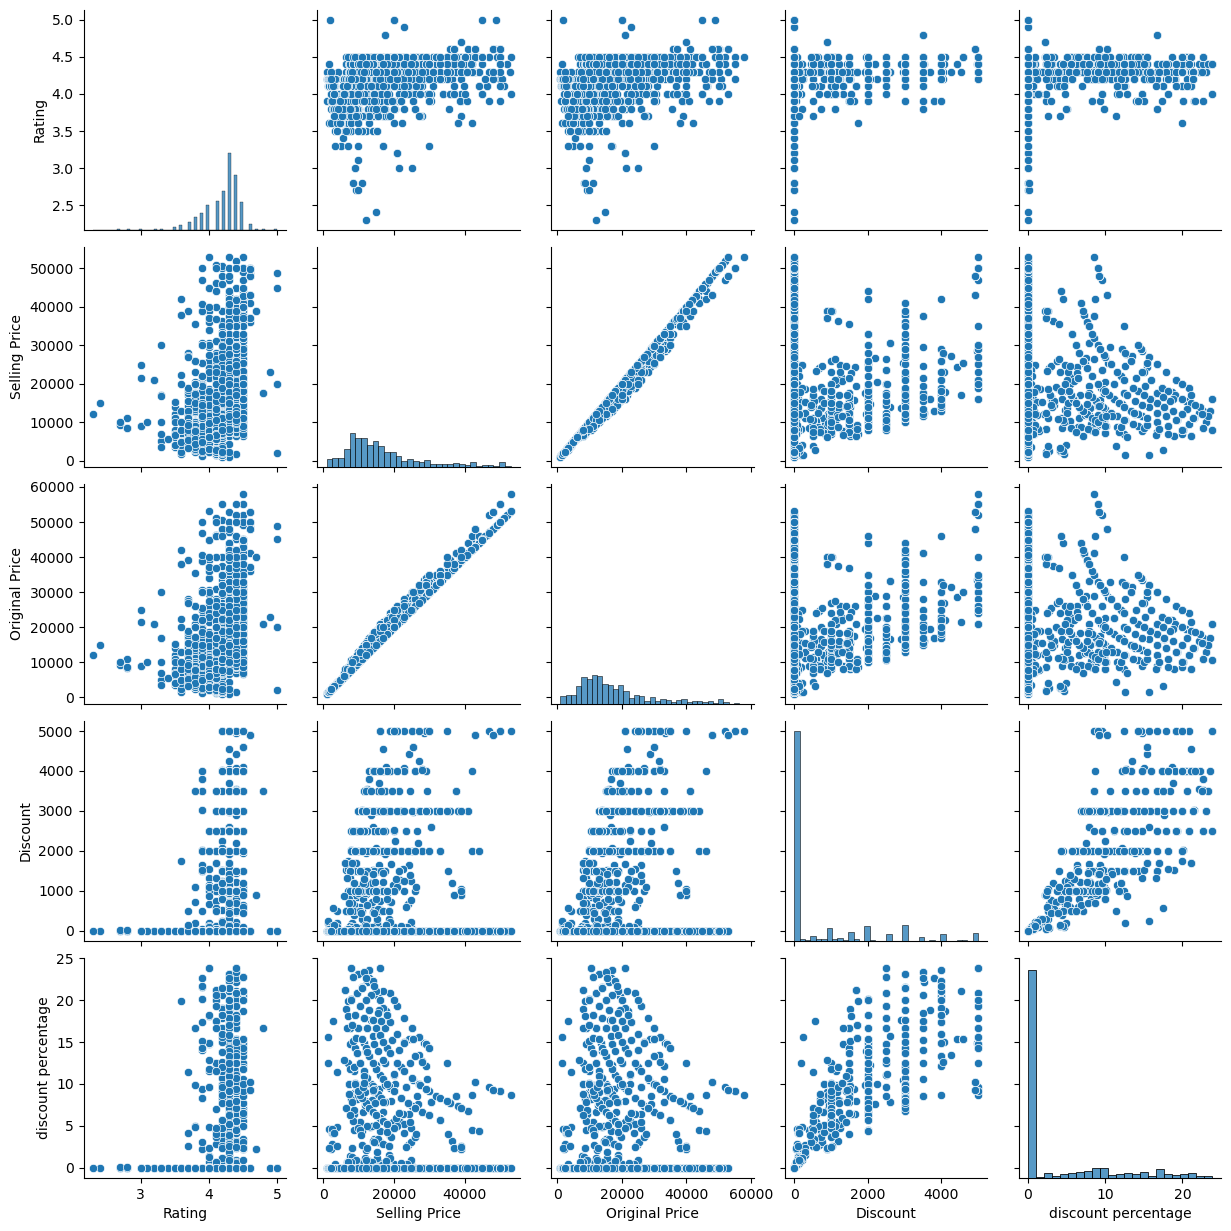

In [17]:
# Handling missing values
data.dropna(inplace=True)

# Handling outliers (assuming "Selling Price" is the target variable)
Q1 = data[['Selling Price', 'discount percentage', 'Discount']].quantile(0.25)
Q3 = data[['Selling Price', 'discount percentage', 'Discount']].quantile(0.75)
IQR = Q3 - Q1

# Identify and filter out the outliers
outliers = ((data[['Selling Price', 'discount percentage', 'Discount']] < (Q1 - 1.5 * IQR)) | (data[['Selling Price', 'discount percentage', 'Discount']] > (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers]

# Visualize the distribution of numerical features after cleaning
sns.pairplot(data)
plt.show()



Mean Squared Error (MSE): 1655177.1441410687
R-squared (R2): 0.9873171982510976


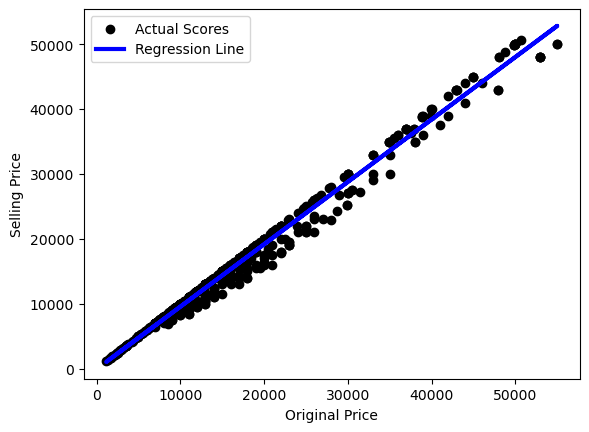

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Feature and labels
X = data['Original Price'].values.reshape(-1, 1)  
y = data['Selling Price'].values 

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8459)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Actual Scores')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.legend()
plt.show()
